# Scikit-Plot for Quick Machine Learning Evaluation
by John DeJesus 12/9/18

This is the notebook for the [Scikit-Plot Youtube Tutorial](https://www.youtube.com/watch?v=w5UPXd3B7Jw). You may read this on your own or follow the video.

## By the end of the tutorial you will be able to:

* Apply [Scikit-Plot](https://scikit-plot.readthedocs.io/en/stable/) to quickly evaluate your machine learning models.


Data Source: [Absenteeism At Work Dataset from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)

In [1]:
# Import Libraries

import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from os import chdir

%matplotlib inline

In [2]:
# Load Data
chdir('D:\\')
absentees = pd.read_csv('Absenteeism_at_work.csv',sep=';')

In [3]:
# Inspect the Data
absentees.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
# Check the info.
absentees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

Text(0,0.5,'Totals')

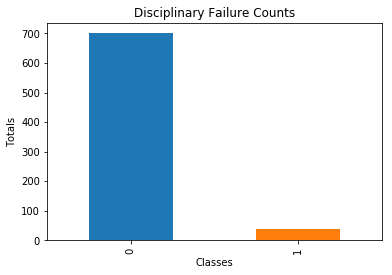

In [5]:
# See the class and counts for Disciplinary Failure (0 = success, 1 = failure).
absentees['Disciplinary failure'].value_counts().plot.bar(title = 'Disciplinary Failure Counts')
plt.xlabel('Classes')
plt.ylabel('Totals')

# Classifier Evaluation

**Note**: No feature engineering or EDA was applied before classifying. This is because the purpose of this notebook is just to showcase Scikit-Plot. When building a real classifier **always** perform EDA and feature engineering first!

In [6]:
# Set up feature matrix X and class vector y.
X = absentees[['Age','Distance from Residence to Work','Work load Average/day ','Weight']]
y = absentees['Disciplinary failure']

In [7]:
# Split data into training and test.
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 1)

In [8]:
# Initiate classifier and fit to data
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
# Apply test data to the classifier and get prediction probabilities
y_pred = classifier.predict_proba(X_test)

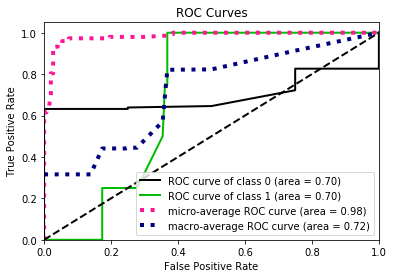

In [10]:
# Plot ROC curve with scikit-plot
skplt.metrics.plot_roc(y_test,y_pred)
plt.show()

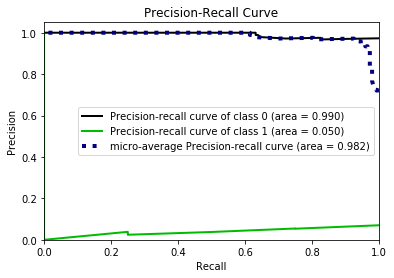

In [11]:
# Now to plot the precision recall plot with scikit-plot
skplt.metrics.plot_precision_recall(y_test, y_pred)
plt.show()

# Clustering Evaluation

In [12]:
# Data to cluster
data_to_cluster = absentees[['Transportation expense','Age']]

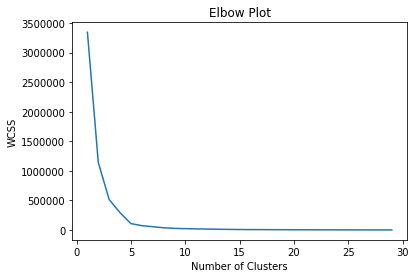

In [13]:
# Long way to plot the elbow plot.
WCSS = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(data_to_cluster)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,30),WCSS)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Cluster data above
kmeans = KMeans(random_state = 1)
clusters = kmeans.fit_predict(data_to_cluster)

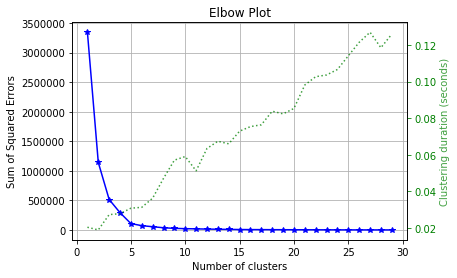

In [15]:
# Plot elbow curve with scikit-plot.
skplt.cluster.plot_elbow_curve(clf=kmeans,X=data_to_cluster, cluster_ranges=range(1, 30))
plt.show()

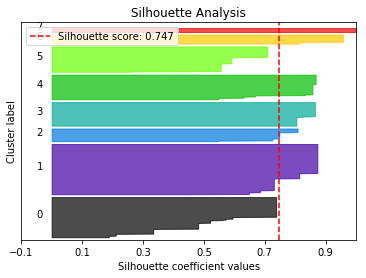

In [16]:
# Plot silhouette plot for alternate cluster evaluation.
skplt.metrics.plot_silhouette(data_to_cluster,clusters)
plt.show()

# Practice Exercises

* Apply Scikit-Plot to speed up your Machine Learning Model evaluation.

# Summary

* Scikit-Plot significantly speeds up the model evaluation process.

## Scikit-Plot Links

* [Github](https://github.com/reiinakano/scikit-plot)
* [Documentation](https://scikit-plot.readthedocs.io/en/stable/)

# Thanks for watching/reading! Let me know if you found this helpful by hitting the like button, subscribing, or leaving a comment!

Links for contact in notebook and description
* [Video Tutorial](https://www.youtube.com/watch?v=w5UPXd3B7Jw)
* [GitHub](http://github.com/johndeJesus22)
* [Twitter](https://twitter.com/johnnydata22)
* [LinkedIn](https://www.linkedin.com/in/jdejesus22/)